# Análise de Dados de Recursos Humanos

### Contexto:

Uma  empresa  de  consultoria que  atua  em  Big  Data  e  Data  Science  deseja  contratar Cientistas de Dados entre pessoas que obtenham aprovação em alguns cursos ministrados pela empresa, e nisso muitas pessoas se inscrevem para o treinamento.



### Defindo o Problema de Negócio:

O objetivo é  contratar  os  profissionais  com  perfil  adequado, a  fim  dereduzir  o  custo  e  o  tempo de contratação, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos. 

Nosso objetivo será analisar os dados, compreender como  estão  organizados,  realizar  limpeza e  transformação  dos  dados  conforme  necessário, para que consigamos encontrar perfil  adequado, para saber realmente quais candidatos querem trabalhar na empresa após o treinamento.

## Instalando e Carregando os Pacotes

In [1]:
!pip install -q category_encoders

In [2]:
!pip install -q plotly

In [3]:
# Importando os Pacotes

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
# Estrátegia para valores ausentes
import math
import sys, os
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *

## Carregando os Dados

In [4]:
df = pd.read_csv('dataset/aug_train.csv')

In [5]:
df.shape

(19158, 14)

In [6]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados

In [9]:
# Descrevendo dados não númericos com o método Describe
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [10]:
# Descrevendo os dados númericos, com exceção de enrollee_id que é irrelevante o pois é uma Indetificação 
# e também de target que está como Float64 e respresenta uma categoria.
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Em **city_development_index** (Índice de desenvolvimento de uma cidade) temos os seguintes valores: 

Média(mean) - 0,828  , Mediana(50%) - 0.903 e Desvio Padrão(std) - 0,123.

Em **training_hours**(Horas de treinamento) temos os seguintes valores:

Média(Mean): 65,36 horas ,Mediana(50%): 47 horas e Máximo(Max): 333 horas.



Quanto maior o Índice de desenvolvimento de uma cidade, mais bem desenvolvida ela é, isso significa que a Média e Mediana deram valores altos e com baixo valor de disperção da variável no Desvio Padrão, concluimos que a maioria dos candidatos é de cidades bem desenvolvidas.

Concluimos também que na média as pessoas levam pouco tempo para concluir o treinamento, mas alguns candidatos estão gastando muito tempo para finalizar o treinamento. 

### Vizualizando as Variáveis Categóricas

In [11]:
# Convertendo todas colunas Categóricas para uma lista, No caso até o do 3 até o 12 porque o 12 é exclusivo.
df.info()
list(df.columns.values)[3:12]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

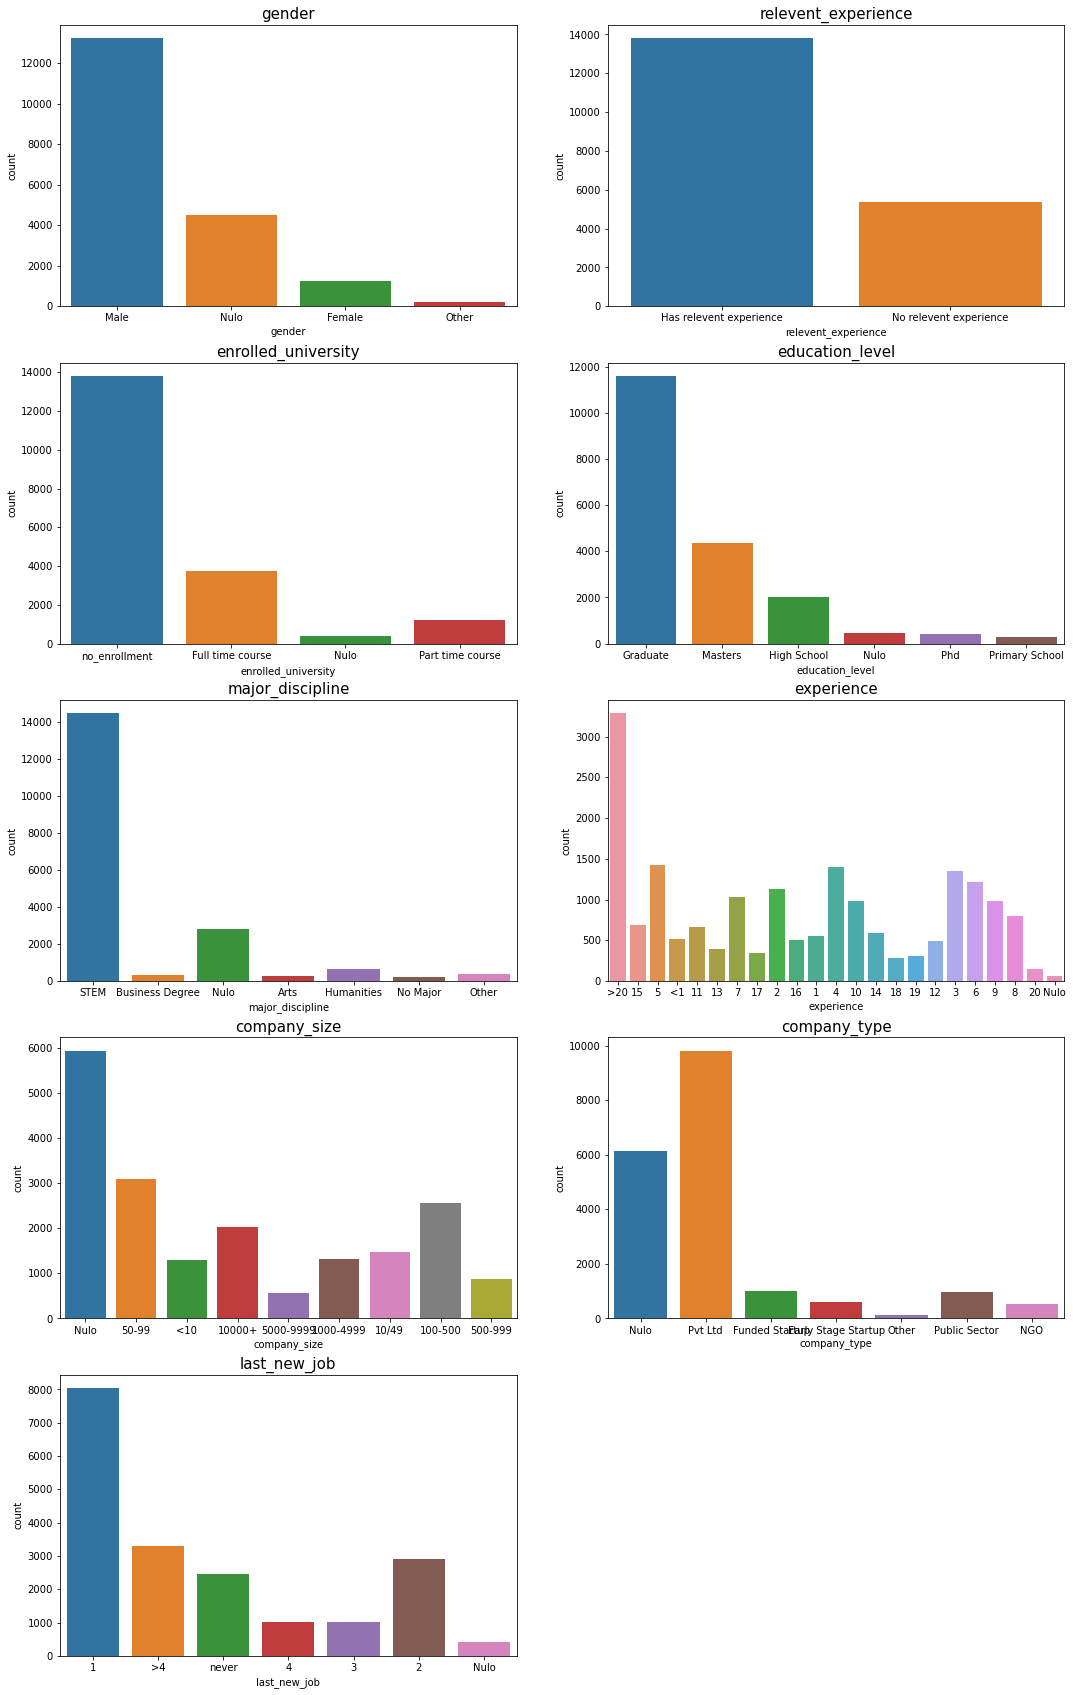

In [12]:
# PLOT

# Primeiro, estabelecendo o tamanho das figuras nos gráficos
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Criando um contador
C = 0

# Criando Loop e com subplot crio a área para cada um dos gráficos, e com Countplot insiro os valores de cada variável
for i in column_list:
    C += 1
    plt.subplot(5 ,2 , C)
    ax = sns.countplot(data = df.fillna('Nulo'), x = i)
    plt.title(i, fontsize = 15 )
    

As variáveis a cima estão coerentes com o que o mercado de Big Data e Ciência de dados propõem como por exemplo, em **gender** a maioria dos candidatos ser do sexo masculino e também em **graduate** a maioria dos canditados ser graduado.

### Verificando a Distribuição das Variáveis Numéricas

In [13]:
# Descrevendo os dados númericos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


<AxesSubplot:xlabel='training_hours'>

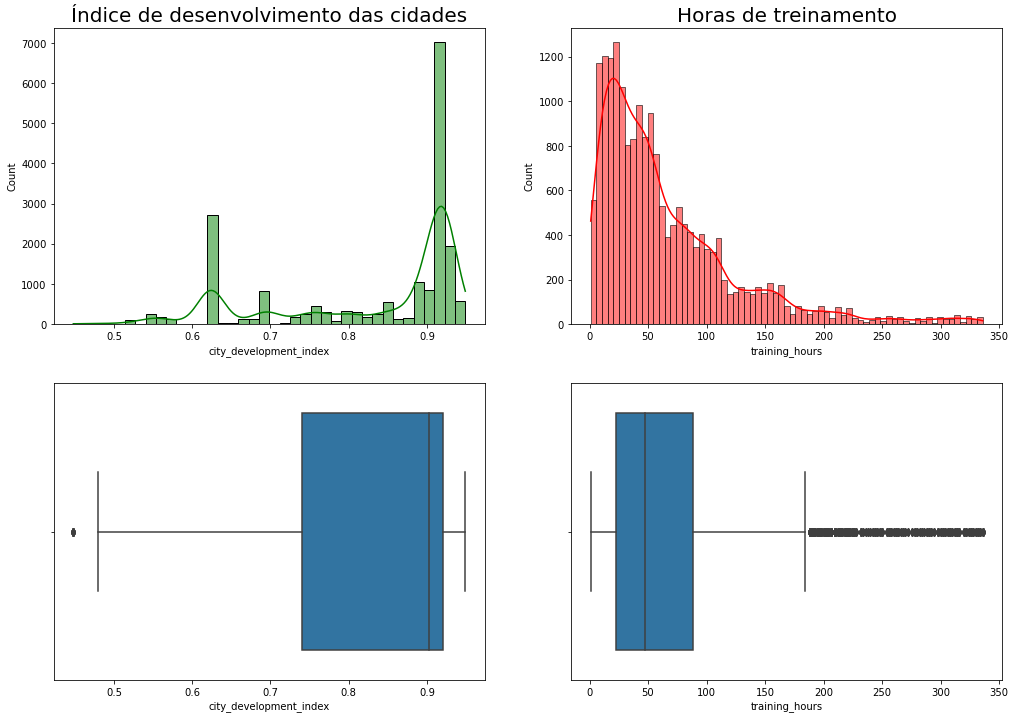

In [14]:
# Primeiro, estabelecendo o tamanho das figuras nos gráficos
plt.figure(figsize = (17,12))

# Subplots com Histograma

plt.subplot(221)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Índice de desenvolvimento das cidades', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "red")
plt.title('Horas de treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'])

plt.subplot(224)
sns.boxplot(df['training_hours'])

De acordo com os gráficos acima, podemos analisar que os dois Histogramas e os dois Boxplots não apresentam uma distribuição normal.

E podemos observar com dois gráficos de baixo, o primeiro Boxplot com muitos valores embaixo da mediana e o segundo com mais valores acima da mediana, assim percebemos que o Boxplot de uma variável é o inverso da outra, que nem os Histogramas acima, entendendo assim como o Histograma e o Boxplot se complementam.

E os Outliers(Valores extremos) são presentes nos dois gráficos, o Outlier é um valor que foge da distribuição dos dados.

Para validar os gráficos, usarei o teste de normalidade nas variáveis númericas.

In [15]:
# Teste de Normalidade da Distruibuição somente para variáveis númericos

# Lista com variáveis númericas
v_numericas = ['city_development_index','training_hours'] 

# Loop para calcular a normalidade
for i in v_numericas:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, 'Distribuição Não Normal')

city_development_index Distribuição Não Normal
training_hours Distribuição Não Normal


Então após o uso do teste de normalidade, podemos avaliar que as duas variáveis não seguem uma distribuição normal. Para a análise númerica, usarei o método não paramétrico. 

### Correlação dos dados

Após analisar as variáveis **experince** e **last_new_job** que tanto podem fazer parte das variáveis númericas ou das variáveis categóricas, mas para conseguir ter uma melhor análise geral, transformarei as duas variáveis em númericas.

Para analisar a correlação das variáveis númericas e entre variável alvo (target) com as variáveis númericas será utilizado a Correlação de Spearman.


In [16]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [17]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [18]:
# Cópia do dataframe original
df_numerico = df.copy()

In [19]:
df_numerico["experience"].value_counts(),

(>20    3286
 5      1430
 4      1403
 3      1354
 6      1216
 2      1127
 7      1028
 10      985
 9       980
 8       802
 15      686
 11      664
 14      586
 1       549
 <1      522
 16      508
 12      494
 13      399
 17      342
 19      304
 18      280
 20      148
 Name: experience, dtype: int64,)

In [20]:
df_numerico["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [21]:
# Convertendo as variáveis experience e last_new_job para númericas

#experience
df_numerico["experience"] = np.where(df_numerico["experience"] == "<1", 1, df_numerico["experience"])
df_numerico["experience"] = np.where(df_numerico["experience"] == ">20", 21, df_numerico["experience"])
df_numerico["experience"] = df_numerico["experience"].astype(float)

#last_new_job
df_numerico["last_new_job"] = np.where(df_numerico["last_new_job"] == "never", 0, df_numerico["last_new_job"])
df_numerico["last_new_job"] = np.where(df_numerico["last_new_job"] == ">4", 5, df_numerico["last_new_job"])
df_numerico["last_new_job"] = df_numerico["last_new_job"].astype(float)


In [22]:
df_numerico["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [23]:
df_numerico["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [24]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [25]:
# Primeiro modo de analisar a correlação de spearman
df_numerico.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


<AxesSubplot:>

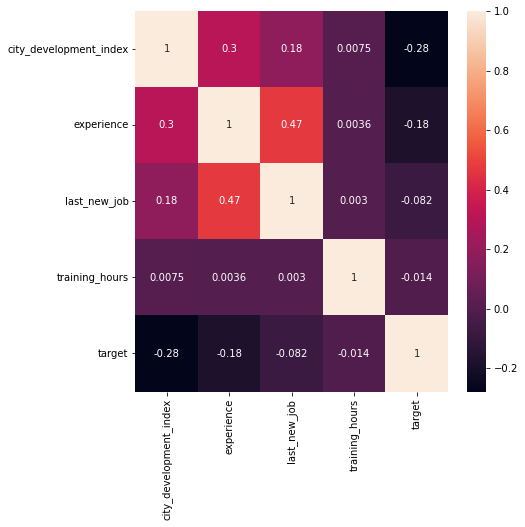

In [26]:
# Analisando as correlações com Mapa de Calor (Heatmap) e excluindo enrollee_id que é irrelevante o pois é uma Indetificação
plt.figure(figsize = (7,7))
sns.heatmap(df_numerico.drop("enrollee_id", axis = 1).corr("spearman"),annot=True)

Pela correlação de spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.

As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.



In [27]:
df_categoria= df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [28]:
df_categoria.drop(columns=['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                           'training_hours',
                          'major_discipline',
                            'experience',
                            'last_new_job',
                            'company_size'])

,gender,relevent_experience,enrolled_university,education_level,company_type
0,Male,Has relevent experience,no_enrollment,Graduate,NaN
1,Male,No relevent experience,no_enrollment,Graduate,Pvt Ltd
2,NaN,No relevent experience,Full time course,Graduate,NaN
3,NaN,No relevent experience,NaN,Graduate,Pvt Ltd
4,Male,Has relevent experience,no_enrollment,Masters,Funded Startup
...,...,...,...,...,...
19153,Male,No relevent experience,no_enrollment,Graduate,NaN
19154,Male,Has relevent experience,no_enrollment,Graduate,NaN
19155,Male,Has relevent experience,no_enrollment,Graduate,Pvt Ltd
19156,Male,Has relevent experience,no_enrollment,High School,Pvt Ltd


## Correlação com variáveis categóricas

O teste de correlação de Cramer's V é uma medida de associação entre variáveis categóricas que varia de 0 a 1, onde 0 indica nenhuma associação e 1 indica uma associação perfeita. 

In [29]:
# Definindo função para correlação de Cramer's V

def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [30]:
# Crie uma tabela de contingência com as duas variáveis
contingency_table = pd.crosstab(df_categoria['gender'], df['target'])

# Calculando o coeficiente de Cramer's V
cramers_v_value = cramers_v(contingency_table)

print('Coeficiente de Cramer\'s V:', cramers_v_value)

Coeficiente de Cramer's V: 0.021925293517042838


In [31]:
# Crie uma tabela de contingência com as duas variáveis
contingency_table = pd.crosstab(df_categoria['enrolled_university'], df['target'])

# Calcule o coeficiente de Cramer's V
cramers_v_value = cramers_v(contingency_table)

# Exiba o resultado
print('Coeficiente de Cramer\'s V:', cramers_v_value)

Coeficiente de Cramer's V: 0.15537647662682152


In [32]:
# Crie uma tabela de contingência com as duas variáveis
contingency_table = pd.crosstab(df_categoria['relevent_experience'], df['target'])

# Calcule o coeficiente de Cramer's V
cramers_v_value = cramers_v(contingency_table)

# Exiba o resultado
print('Coeficiente de Cramer\'s V:', cramers_v_value)

Coeficiente de Cramer's V: 0.12809584889436332


In [33]:
# Crie uma tabela de contingência com as duas variáveis
contingency_table = pd.crosstab(df_categoria['education_level'], df['target'])

# Calcule o coeficiente de Cramer's V
cramers_v_value = cramers_v(contingency_table)

# Exiba o resultado
print('Coeficiente de Cramer\'s V:', cramers_v_value)

Coeficiente de Cramer's V: 0.09298413232413384


In [34]:
contingency_table = pd.crosstab(df_categoria['company_type'], df['target'])

# Calcule o coeficiente de Cramer's V
cramers_v_value = cramers_v(contingency_table)

# Exiba o resultado
print('Coeficiente de Cramer\'s V:', cramers_v_value)

Coeficiente de Cramer's V: 0.04803513630782016


* Com base em seu valor de Coeficiente de Cramer's V, `enrolled_university`, `relevent_experience` e `education_level` tem uma associação pequena entre a variável alvo(target), as outras variáveis escolhidas foram descartadas pela baixa associação com a variável alvo(target).

## Indentificando valores ausentes por coluna

Text(0.5, 1.0, 'Plot de Valores Ausentes')

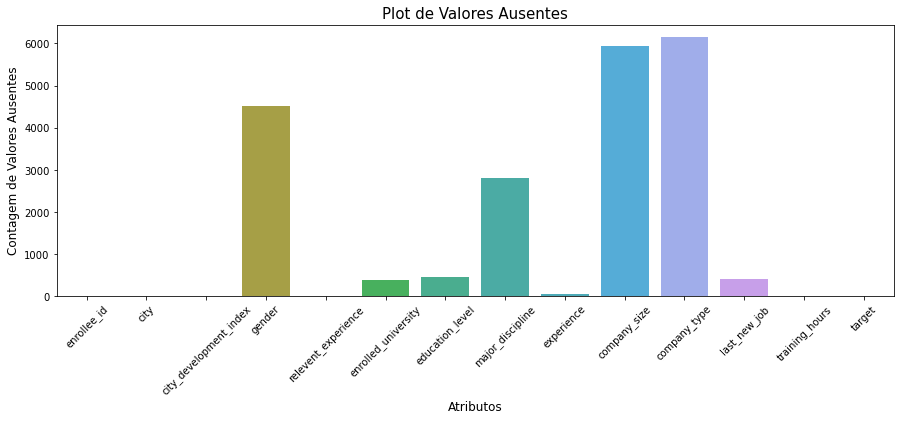

In [35]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(null_df['index'],null_df[0])
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)


In [36]:
# Checando valores duplicados em variável ID
df['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

Text(0.5, 1.0, 'Barplot Target Label')

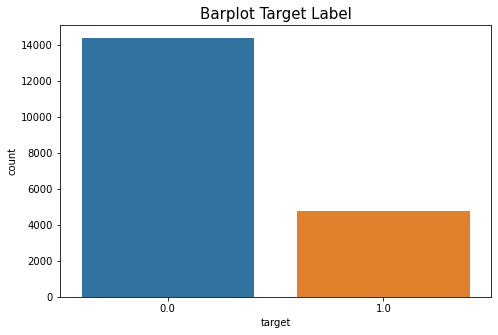

In [37]:
# Figura
plt.figure(figsize = (17,(100)/20))


plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)

Os dados estão desbalanceados em relação à variável target.

### Tratando os Valores Ausentes

In [38]:
# Verifica o percentual de valores ausentes
# Função do módulo estratégia 1
func_calc_percentual_valores_ausentes(df)

O dataset tem 7.73 % de valores ausentes.


In [39]:
# Cria tabela com valores ausentes
df_missing = func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 14 colunas.
Encontrado: 8 colunas que têm valores ausentes.


In [40]:
df_missing

,Valores Ausentes,% de Valores Ausentes,Dtype
company_type,6140,32.05,object
company_size,5938,30.99,object
gender,4508,23.53,object
major_discipline,2813,14.68,object
education_level,460,2.40,object
last_new_job,423,2.21,object
enrolled_university,386,2.01,object
experience,65,0.34,object


Removeremos colunas com mais de 30% de valores ausentes.

In [41]:
# Colunas que serão removidas
colunas_para_remover = df_missing[df_missing['% de Valores Ausentes'] >= 30.00].index.tolist()

In [42]:
colunas_para_remover

['company_type', 'company_size']

In [43]:
novo_df = df.drop(colunas_para_remover, axis = 1)

In [44]:
novo_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0


In [45]:
func_calc_percentual_valores_ausentes(novo_df)

O dataset tem 3.76 % de valores ausentes.


In [46]:
novo_df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'last_new_job', 'training_hours',
       'target'],
      dtype='object')

In [47]:
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'major_discipline',
                  'target']

In [48]:
new_df = novo_df[colunas_manter]

In [49]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,STEM,0.0


#### Major_discipline


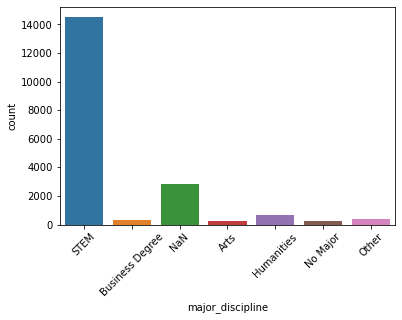

In [50]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline')
plt.xticks(rotation = 45)

ax = plt.gca()

In [51]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

 * Dentre os registros com valores ausentes, vemos a proporção na variável education_level.

* Preencheremos os valores NA da variável `major_discipline` com `Non Degree`.

In [52]:
# Cria Índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index

In [53]:
len(nan_index)

2785

In [54]:
# Imputação do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [55]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

In [56]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()]  = 'Other'

In [57]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 0


STEM               14492
Non Degree          2785
Humanities           669
Other                409
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

#### Variável enrolled_university

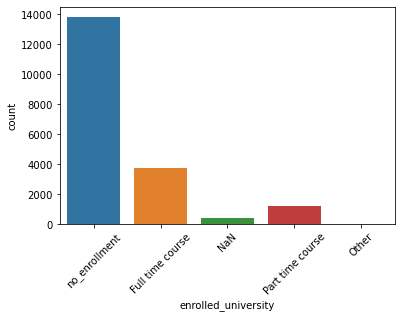

In [58]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university')
plt.xticks(rotation = 45)
ax = plt.gca()

In [59]:
# Preparar o Índice
nan_index2 = new_df[(new_df['enrolled_university'].isna())].index

In [60]:
len(nan_index2)

385

In [61]:
# Imputação dos valores Nan para a categoria 'Other'  
new_df['enrolled_university'][nan_index2] = 'Other'

In [62]:
print('Total de Valores Ausentes', new_df['enrolled_university'].isna().sum())
new_df['enrolled_university'].value_counts(dropna = False)

Total de Valores Ausentes 0


no_enrollment       13801
Full time course     3747
Part time course     1197
Other                 413
Name: enrolled_university, dtype: int64

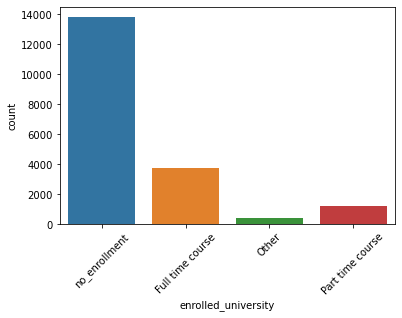

In [63]:
# Valores Ausentes da Variável education_level  do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university')
plt.xticks(rotation = 45)
ax = plt.gca()

* Nesse caso foi escolhido uma abordagem mais genérica, em que os valores NaN foram para 'Other', junto com pessoal do Primary_Grad, para reduzir as categorias de 'enrolled_university'.

#### Variável education_level

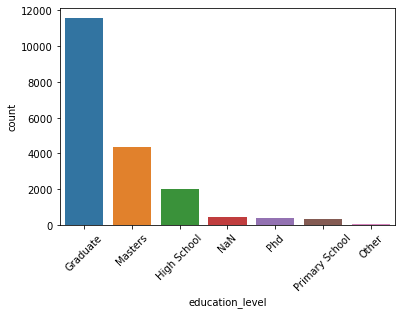

In [64]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level')
plt.xticks(rotation = 45)
ax = plt.gca()

In [65]:
# Índice
nan_index3 = new_df[(new_df['education_level'].isna())].index

In [66]:
# Imputação dos valores Nan para a categoria 'Other'  
new_df['education_level'][nan_index3] = 'Other'

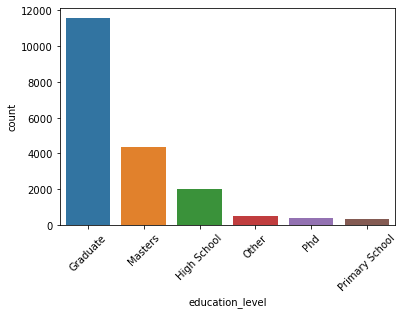

In [67]:
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level')
plt.xticks(rotation = 45)
ax = plt.gca()

#### Variável experience

In [68]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city_development_index  19158 non-null  object
 1   experience              19095 non-null  object
 2   enrolled_university     19158 non-null  object
 3   relevent_experience     19158 non-null  object
 4   education_level         19158 non-null  object
 5   major_discipline        19158 non-null  object
 6   target                  19158 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [69]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [70]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [71]:
new_df['experience'].isnull().sum()

63

In [72]:
new_df = new_df.dropna()

In [73]:
new_df.shape

(19095, 7)

In [74]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
major_discipline          0.0
target                    0.0
dtype: float64

## Relatório Final

#### Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.